In [1]:
#Loading the imdb dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [2]:
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [3]:
#Decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
#This model has 32, 16 nodes and three layers for building your model. The activation function "tanh" is used in place of "ReLU."
#Since the ReLU function's ranges from 0 to infinity, it is inappropriate to use it for situations in where negative values are essential. 
#With zero serving as the midpoint and a range of -1 to +1, the Tanh function is useful for models that have both positive and negative values.
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(32,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(16,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(16,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
#compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#validating hte approach
#setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
#training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6537 - loss: 0.3404 - val_accuracy: 0.8397 - val_loss: 0.1898
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8651 - loss: 0.1754 - val_accuracy: 0.8727 - val_loss: 0.1334
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8947 - loss: 0.1265 - val_accuracy: 0.8794 - val_loss: 0.1210
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9002 - loss: 0.1138 - val_accuracy: 0.8815 - val_loss: 0.1169
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9188 - loss: 0.0985 - val_accuracy: 0.8827 - val_loss: 0.1178
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9273 - loss: 0.0916 - val_accuracy: 0.8780 - val_loss: 0.1201
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9190 - loss: 0.0941 - val_accuracy: 0.8762 - val_loss: 0.1220
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9180 - loss: 0.0969 - val_accuracy: 0.8779 - v

In [9]:
history_dict = history.history
history_dict.keys() 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

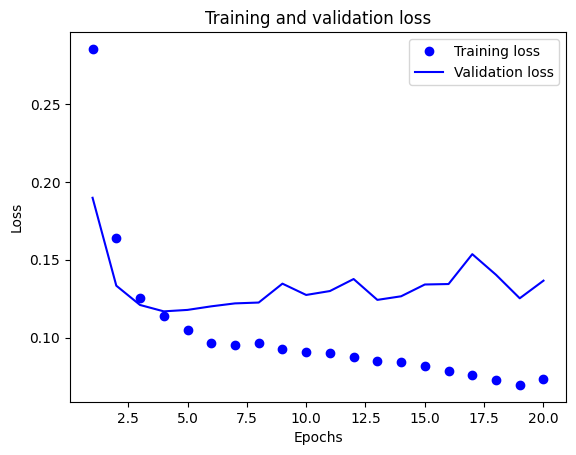

In [10]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

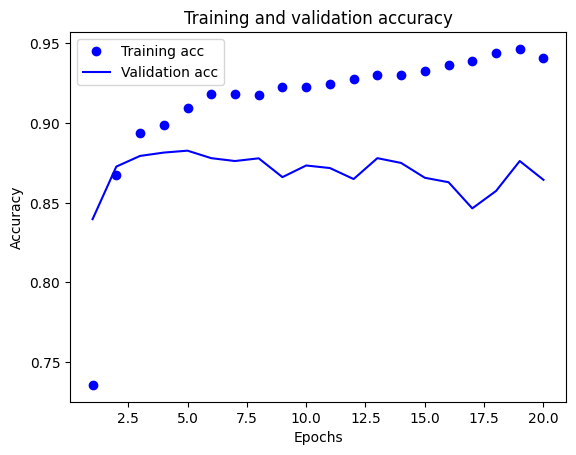

In [11]:
#plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8536 - loss: 0.1457


In [13]:
results

[0.14254535734653473, 0.8569999933242798]

In [ ]:
#Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(32,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

model = keras.Sequential([
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6650 - loss: 0.3987
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8900 - loss: 0.1434
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9083 - loss: 0.1260
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9134 - loss: 0.1237
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8728 - loss: 0.1520
Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6409 - loss: 0.3200
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8689 - loss: 0.1508
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9030 - loss: 0.1192
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9138 - loss: 0.1133
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8721 - loss: 0.1401


In [15]:
results

[0.13997380435466766, 0.8726800084114075]